In [1]:
# read csv file and clean the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
def read_csv(file_path):
    """
    Read csv file and return a pandas dataframe
    
    Parameters:
    file_path: str, path to the csv file
    
    Returns:
    data: pandas dataframe
    """
    data = pd.read_csv(file_path)
    return data

def decompose(data):
    """
    Decompose the data into different materials
    
    Parameters:
    data: pandas dataframe with columns 'Channel A', 'Channel B', 'Time', 'Temperature'
    
    Returns:
    data_A: pandas dataframe with columns 'Voltage', 'Time', 'Temperature'
    data_B: pandas dataframe with columns 'Voltage', 'Time', 'Temperature'
    """
    data_A = data[['Channel A', 'Time', 'Temperature']]
    data_B = data[['Channel B', 'Time', 'Temperature']]
    
    data_A.columns = ['Voltage', 'Time', 'Temperature']
    data_B.columns = ['Voltage', 'Time', 'Temperature']

    return data_A, data_B

In [3]:
# channel A - type T thermocouple
# channel B - Nickel Copper thermocouple
# heating from -200 to above 0 C
messung_1 = read_csv('data_combined/Messung_1.csv')
Kupfer_Konstantan_low, Kupfer_Nickel_low = decompose(messung_1)

# channel A - type T thermocouple
# channel B - Nickel Copper thermocouple
# cooling from 100 to 0 C
messung_2 = read_csv('data_combined/Messung_2_Dritter_Versuch.csv')
Kupfer_Konstantan_high, Kupfer_Nickel_high = decompose(messung_2)


# channel A - type T thermocouple
# channel B - Nickel Copper thermocouple
# cooling from 100 to = C
# block fell off at some point
messung_2_attempt = read_csv('data_combined/Messung_2.csv')
Kupfer_Konstantan_high_attempt, Kupfer_Nickel_high_attempt = decompose(messung_2_attempt)

# channel A - Copper Graphene thermocouple
messung_3 = read_csv('data_combined/KupferGraphen.csv')
Kupfer_Graphen, _ = decompose(messung_3)

# channel A - Copper Graphite thermocouple
messung_4 = read_csv('data_combined/Messung_4.csv')
Kupfer_Graphit, _ = decompose(messung_4)
Kupfer_Graphit = Kupfer_Graphit.dropna()

# channel A - Graphene Graphite thermocouple
messung_5 = read_csv('data_combined/Messung_5.csv')
Graphen_Graphit, _ = decompose(messung_5)




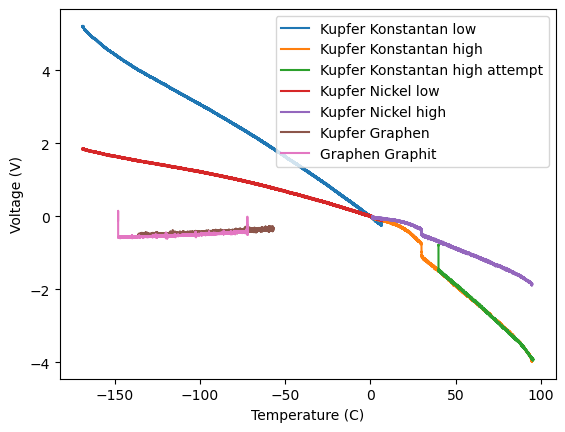

In [4]:
# plot the voltages vs temperature

plt.figure()
plt.plot(Kupfer_Konstantan_low['Temperature'], Kupfer_Konstantan_low['Voltage'], label='Kupfer Konstantan low')
plt.plot(Kupfer_Konstantan_high['Temperature'], Kupfer_Konstantan_high['Voltage'], label='Kupfer Konstantan high')
plt.plot(Kupfer_Konstantan_high_attempt['Temperature'], Kupfer_Konstantan_high_attempt['Voltage'], label='Kupfer Konstantan high attempt')

plt.plot(Kupfer_Nickel_low['Temperature'], Kupfer_Nickel_low['Voltage'], label='Kupfer Nickel low')
plt.plot(Kupfer_Nickel_high['Temperature'], Kupfer_Nickel_high['Voltage'], label='Kupfer Nickel high')

plt.plot(Kupfer_Graphen['Temperature'], Kupfer_Graphen['Voltage'], label='Kupfer Graphen')
#plt.plot(Kupfer_Graphit['Temperature'], Kupfer_Graphit['Voltage'], label='Kupfer Graphit')
plt.plot(Graphen_Graphit['Temperature'], Graphen_Graphit['Voltage'], label='Graphen Graphit')

plt.xlabel('Temperature (C)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()